## Откройте и изучите файл

Откроем файл с данными и изучим его.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# информация о датасете

df = pd.read_csv('/datasets/users_behavior.csv')
print(df.head())
print(df.info())

   calls  minutes  messages   mb_used  is_ultra
0   40.0   311.90      83.0  19915.42         0
1   85.0   516.75      56.0  22696.96         0
2   77.0   467.66      86.0  21060.45         0
3  106.0   745.53      81.0   8437.39         1
4   66.0   418.74       1.0  14502.75         0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB
None


## Разбейте данные на выборки

Для того, чтобы обучить модель, необходимо разделить признаки и целевые признаки на обучающую, валидационную и тестовую выборки. Произведем разделение в соотношении 3:1:1

In [3]:
# Выделим признаки

features = df.drop('is_ultra', axis=1) 

# Выделим целевой признак

target = df['is_ultra'] 

# Импортируем train_test_split из модуля sklearn.model_selection

from sklearn.model_selection import train_test_split as tts

# Разделим признаки и целевой признак в соотношении 3:1:1 на обучающую, валидационную и тестовую,
# предварительно выделив валидационную и тестовую в одну выборку

features_train, features_valid_and_test, target_train, target_valid_and_test = tts(
    features, target, test_size=0.4, random_state=12345)

# Выделим валидационную и тестовую выборку

features_valid, features_test, target_valid, target_test = tts(
    features_valid_and_test, target_valid_and_test, test_size=0.5, random_state=12345)

# рассмотрим размеры обучающей, валидационной и тестовой выборок.

print('Размер обучающей выборки с признаками', features_train.shape)
print('Размер обучающей выборки с целевым признаком', target_train.shape)
print('Размер валидационной выборки с признаками', features_valid.shape)
print('Размер валидационной выборки с целевым признаком', target_valid.shape)
print('Размер тестовой выборки с признаками', features_test.shape)
print('Размер тестовой выборки с целевым признаком', target_test.shape)

Размер обучающей выборки с признаками (1928, 4)
Размер обучающей выборки с целевым признаком (1928,)
Размер валидационной выборки с признаками (643, 4)
Размер валидационной выборки с целевым признаком (643,)
Размер тестовой выборки с признаками (643, 4)
Размер тестовой выборки с целевым признаком (643,)


## Исследуйте модели

Для исследования выберем следующие алгоритмы классификации для обучения модели: 1) случайный лес, 2) дерево решений, 3) логистическая регрессия.

In [4]:
# импортируем алгоритм "случайный лес".

from sklearn.ensemble import RandomForestClassifier as RFC

# для определения лучших параметров зададим начальные значения параметров и запустим циклы для их перебора.

best_model_rfc = None
best_result_rfc = 0
for est in range(1, 11): # переберем количество деревьев в лесу
    for crit in ['gini', 'entropy']: # переберем функцию измерения качества разделения
        for depth in range(1, 11): # переберем максимальную глубину дерева
            model_rfc = RFC(random_state=12345, 
                        n_estimators=est, 
                        criterion = crit,
                        max_depth = depth) 
            model_rfc.fit(features_train, target_train) # обучим модель на тренировочной выборке
            result = model_rfc.score(features_valid, target_valid) # посчитаем качество модели на валидационной выборке
            if result > best_result_rfc:
                best_model_rfc = model_rfc # сохраним наилучшую модель
                best_result_rfc = result  # сохраним наилучшее значение метрики accuracy на валидационных данных
                best_est_rfc = est # сохраним наилучшее количество деревьев в лесу
                best_crit = crit # сохраним наилучшую функцию измерения качества разделения
                best_depth_rtc = depth # сохраним наилучшую максимальную глубину дерева
print("Accuracy модели алгоритма 'случайный лес' на валидационной выборке:", best_result_rfc) 
print('Наилучшее количество деревьев в лесу:', best_est_rfc)
print('Наилучшая функция измерения качества разделения:', best_crit)
print('Наилучшая максимальная глубина дерева:',best_depth_rtc)

Accuracy модели алгоритма 'случайный лес' на валидационной выборке: 0.8040435458786936
Наилучшее количество деревьев в лесу: 10
Наилучшая функция измерения качества разделения: entropy
Наилучшая максимальная глубина дерева: 9


Рассмотрим графически зависимость качества модели от количества деревьев в лесу.

Text(0, 0.5, 'Accuracy')

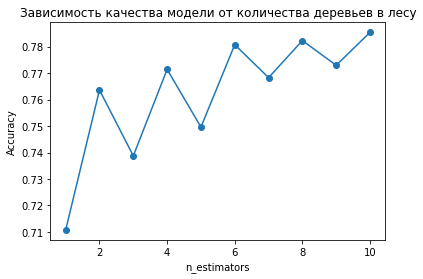

In [5]:
est_rfc = []
result_est = []

for est in range(1, 11):
    model_rfc = RFC(random_state=12345, 
                    n_estimators=est) # создадим модель с различным количество дереьев
    model_rfc.fit(features_train, target_train) # обучим модель на тренировочной выборке
    result_rfc = model_rfc.score(features_valid, target_valid) # посчитаем качество модели на валидационной выборке
    est_rfc.append(est)
    result_est.append(result_rfc)

plt.plot(est_rfc, result_est, 'o-')
plt.title('Зависимость качества модели от количества деревьев в лесу')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
    
    

Рассмотрим графически зависимости качества модели от функции измерения качества разделения.

Text(0, 0.5, 'Accuracy')

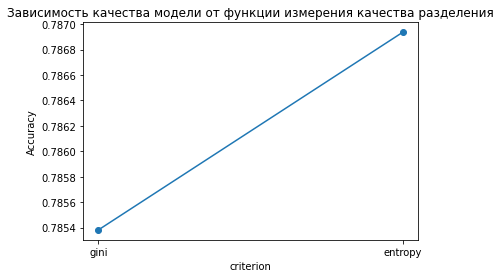

In [6]:
crit_rfc = []
result_crit = []

for crit in ['gini', 'entropy']:
    model_rfc = RFC(random_state=12345, 
                    criterion = crit) # создадим модель с различным количество дереьев
    model_rfc.fit(features_train, target_train) # обучим модель на тренировочной выборке
    result_rfc = model_rfc.score(features_valid, target_valid) # посчитаем качество модели на валидационной выборке
    crit_rfc.append(crit)
    result_crit.append(result_rfc)

plt.plot(crit_rfc, result_crit, 'o-')
plt.title('Зависимость качества модели от функции измерения качества разделения')
plt.xlabel('criterion')
plt.ylabel('Accuracy')

Рассмотрим графически зависимости качества модели от максимальной глубины дерева.

Text(0, 0.5, 'Accuracy')

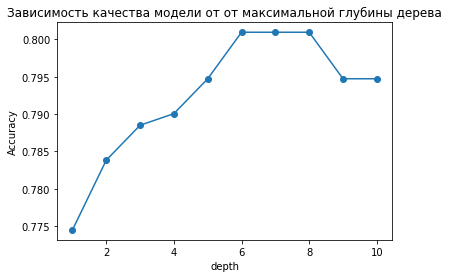

In [7]:
depth_rfc = []
result_depth = []

for depth in range(1, 11):
    model_rfc = RFC(random_state=12345, 
                    max_depth = depth) # создадим модель с различным количество дереьев
    model_rfc.fit(features_train, target_train) # обучим модель на тренировочной выборке
    result_rfc = model_rfc.score(features_valid, target_valid) # посчитаем качество модели на валидационной выборке
    depth_rfc.append(depth)
    result_depth.append(result_rfc)

plt.plot(depth_rfc, result_depth, 'o-')
plt.title('Зависимость качества модели от от максимальной глубины дерева')
plt.xlabel('depth')
plt.ylabel('Accuracy')    

Как можно заметить, пиковые значения параметров "количество деревьев в лесу" и "функции измерения качества разделения" на графиках совпадают с полученными наилучшими значениями параметрамов. Параметр "максимальная глубины дерева" не имеет наибольшее значение в наилучшем значении параметра. Скорее всего это связано с тем, что в именно в такой комбинации всех параметров значение качества имеет наибольшее значение. 

In [8]:
# импортируем алгоритм "дерево решений".

from sklearn.tree import DecisionTreeClassifier as DTC

# для определения лучших параметров зададим начальные значения параметров и запустим циклы для их перебора.

best_model_dtc = None
best_result_dtc = 0
best_depth_dtc = 0
best_crit = []
best_split = []
for depth in range(1, 20): # переберем максимальную глубину дерева
    for crit in ['gini', 'entropy']: # переберем функцию измерения качества разделения
        for split in ['best', 'random']: # переберем стратегию, используемую для выбора разделения в каждом узле
                model_dtc = DTC(random_state=12345, 
                                max_depth=depth,
                                criterion = crit,
                                splitter = split) 
                model_dtc.fit(features_train, target_train) # обучим модель на тренировочной выборке
                result_dtc = model_dtc.score(features_valid, target_valid) # посчитаем значение метрики accuracy на валидационной данных
                if result_dtc > best_result_dtc:
                    best_model_dtc = model_dtc # сохраним наилучшую модель
                    best_result_dtc = result_dtc # сохраним наилучшее значение метрики accuracy на валидационных данных
                    best_depth_dtc = depth # сохраним наилучшее значение максимальной глубины дерева
                    best_criterion = crit # сохраним наилучшее значение функции измерения качества разделения
                    best_splitter = split # сохраним наилучшую стратегию, используемую для выбора разделения в каждом узле
print("Accuracy наилучшей модели алгоритма 'дерево решений'  на валидационной выборке:", best_result_dtc) 
print("Наилучшее значение максимальной глубины дерева:", best_depth_dtc)
print('Наилучшее значение функции измерения качества разделения:', best_criterion)
print('Наилучшая стратегия, используемая для выбора разделения в каждом узле:',best_splitter )

Accuracy наилучшей модели алгоритма 'дерево решений'  на валидационной выборке: 0.7884914463452566
Наилучшее значение максимальной глубины дерева: 7
Наилучшее значение функции измерения качества разделения: entropy
Наилучшая стратегия, используемая для выбора разделения в каждом узле: random


Рассмотрим графически зависимости качества модели от максимальной глубины дерева.

Text(0, 0.5, 'Accuracy')

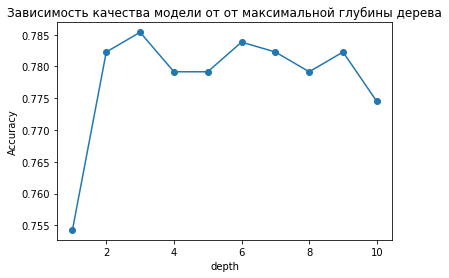

In [9]:
depth_dtc = []
result_depth = []

for depth in range(1, 11):
    model_dtc = DTC(random_state=12345,max_depth=depth) 
    model_dtc.fit(features_train, target_train) # обучим модель на тренировочной выборке
    result_dtc = model_dtc.score(features_valid, target_valid) # посчитаем качество модели на валидационной выборке
    depth_dtc.append(depth)
    result_depth.append(result_dtc)

plt.plot(depth_dtc, result_depth, 'o-')
plt.title('Зависимость качества модели от от максимальной глубины дерева')
plt.xlabel('depth')
plt.ylabel('Accuracy')    

Рассмотрим графически зависимости качества модели от функции измерения качества разделения.

Text(0, 0.5, 'Accuracy')

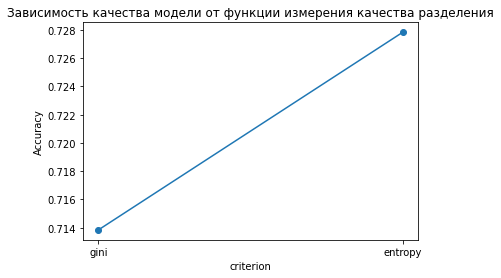

In [10]:
crit_dtc = []
result_crit = []

for crit in ['gini', 'entropy']:
    model_dtc = DTC(random_state=12345, 
                                criterion = crit) 
    model_dtc.fit(features_train, target_train) # обучим модель на тренировочной выборке
    result_dtc = model_dtc.score(features_valid, target_valid) # посчитаем качество модели на валидационной выборке
    crit_dtc.append(crit)
    result_crit.append(result_dtc)

plt.plot(crit_dtc, result_crit, 'o-')
plt.title('Зависимость качества модели от функции измерения качества разделения')
plt.xlabel('criterion')
plt.ylabel('Accuracy')    

Рассмотрим графически зависимости качества модели от стратегии, используемой для выбора разделения в каждом узле.

Text(0, 0.5, 'Accuracy')

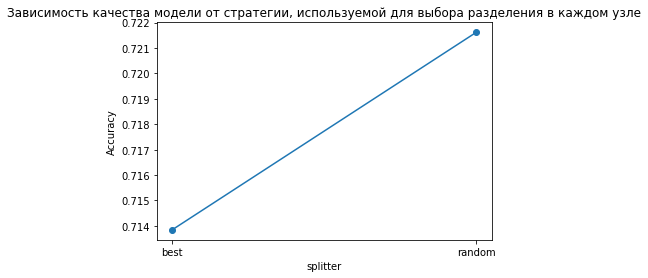

In [11]:
split_dtc = []
result_split = []

for split in ['best', 'random']:
    model_dtc = DTC(random_state=12345, 
                               splitter = split) 
    model_dtc.fit(features_train, target_train) # обучим модель на тренировочной выборке
    result_dtc = model_dtc.score(features_valid, target_valid) # посчитаем качество модели на валидационной выборке
    split_dtc.append(split)
    result_split.append(result_dtc)

plt.plot(split_dtc, result_split, 'o-')
plt.title('Зависимость качества модели от стратегии, используемой для выбора разделения в каждом узле')
plt.xlabel('splitter')
plt.ylabel('Accuracy')  

Можно сделать вывод, что для параметров "функция измерения качества разделения" и "стратегия, используемую для выбора разделения в каждом узле" графически максимальное значение качества соответствует наилучшим значениям. Параметр "максимальная глубины дерева" не имеет наибольшее значение в наилучшем значении параметра. Скорее всего это связано с тем, что в именно в такой комбинации всех параметров значение качества имеет наибольшее значение.

In [12]:
# импортируем алгоритм "логистическая регрессия".

from joblib import dump

from sklearn.linear_model import LogisticRegression as LR

# инициализируем модель LogisticRegression с параметрами random_state=12345, solver='lbfgs' и max_iter=1000

solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
best_result_lr = 0

for sol in solvers: # переберем алгоритм для использования в задаче оптимизации
    model_lr = LR(random_state=12345, 
                  solver=sol, 
                  max_iter=1000) 
    model_lr.fit(features_train, target_train) # обучим модель на тренировочной выборке
    result_lr = model_lr.score(features_valid, target_valid) # посчитаем значение метрики accuracy на валидационной данных
    if result_lr > best_result_lr:
        best_result_lr = result_lr
        best_sol = sol
print("Accuracy наилучшей модели алгоритма 'логистическая регрессия' на валидационной выборке:", best_result_lr)
print("Наилучший алгоритм для использования в задаче оптимизации:",best_sol)

Accuracy наилучшей модели алгоритма 'логистическая регрессия' на валидационной выборке: 0.7558320373250389
Наилучший алгоритм для использования в задаче оптимизации: newton-cg


Посмотрим графическую зависимость качество модели от алгоритма для использования в задаче оптимизации.

Text(0, 0.5, 'Accuracy')

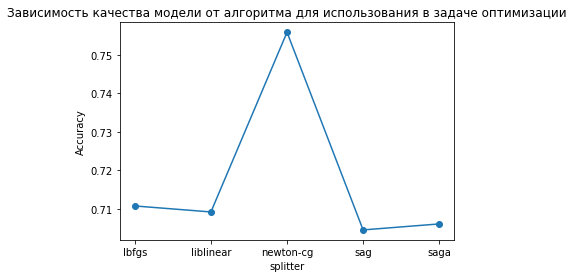

In [13]:
split_lr = []
result_split = []

for sol in solvers:
    model_lr = LR(random_state=12345, 
                  solver=sol, 
                  max_iter=1000)
    model_lr.fit(features_train, target_train)
    dump(model_lr, 'model_9_1.joblib')
    result = model_lr.score(features_valid, target_valid)
    split_lr.append(sol)
    result_split.append(result)

plt.plot(split_lr, result_split, 'o-')
plt.title('Зависимость качества модели от алгоритма для использования в задаче оптимизации')
plt.xlabel('splitter')
plt.ylabel('Accuracy') 

Как можно заметить графически наибольшее значение accuracy соответствует тому же алгоритму для использования в задаче оптимизации, что и при определении через цикл.

Наибольшое значение accuracy, равное 0,785, имеет модель с алгоритмом "случайный лес". Выбираем модель с данным алгоритмом для проверки тестовой выборки.

## Проверьте модель на тестовой выборке

Проверим качество модель с алгоритмом "случайный лес" на тестовой выборке.

In [14]:
result = best_model_rfc.score(features_test, target_test) # посчитаем качество модели на тестовой выборке
print("Accuracy модели алгоритма 'логистическая регрессия' на тестовой выборке:", result)

Accuracy модели алгоритма 'логистическая регрессия' на тестовой выборке: 0.8102643856920684


Модель с алгоритмом "случайный лес" на тестовой выборке имеет высокое значение качества, 0,77, что больше необходимой точности, 0,75.

## (бонус) Проверьте модели на адекватность

Проверим модель на вменяемость. Для этого используем классификатор DummyClassifier. Данный классификатор делает прогнозы, при этом игнорирует входные признаки. Это модель классификатора, которая делает прогнозы, не пытаясь найти закономерности в данных. Модель по умолчанию по существу рассматривает, какая метка наиболее часто встречается в обучающем наборе данных, и делает прогнозы на основе этой метки. 

In [15]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(features_train, target_train)
result_test = dummy_clf.score(features_test, target_test)
print(result_test)

0.6842923794712286


Можно сделать вывод, что точноть классификатора DummyClassifier, равный 0,684 ниже выбранного алгоритма для модели, равный 0,785. Следовательно наша модель адекватна и достаточна точна.